*Autor: Gabriel Mendes*   
[<img alt="Colaboratory logo" width="10%" src="https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white">](https://www.linkedin.com/in/gabriel-mendes-3b4a16149/)


## Previsão do preço de venda de imóveis utilizando os modelos Decision Tree e Random Forest

Este código utiliza os modelos de machine learning Decision Tree e Random Forest do Scikit-Learn para prever o preço de venda de imóveis no estado de Iowa - EUA. 

O objetivo do modelo é prever o preço de venda de casas (variável alvo, "SalePrice") com base em um conjunto de características (ou "features") das casas, como área do lote, número de quartos, banheiros, etc.

O processo de criação do modelo começa importando as bibliotecas necessárias para executar as etapas seguintes. Em seguida, carrega-se um arquivo de dados (train.csv) em um DataFrame chamado "home_data".

In [68]:
# Importa as bibliotecas necessárias
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Carrega o arquivo com os dados
iowa_file_path = 'train.csv'
home_data = pd.read_csv(iowa_file_path)

### Análise Exploratória dos Dados

Primeiramente foi feita uma análise exploratória do conjunto de dados. Utilizando o comando "describe()" são exibidos 8 valores que são um resumo estatístico de cada coluna do dataset. Abaixo é mostrado a descrição de um destes valores:
* Count (contagem): O número de observações (linhas) no conjunto de dados. Este valor indica quantas linhas têm pelo menos um valor não nulo em cada coluna. O valor da contagem pode ser menor do que o número total de linhas no dataset se houver valores ausentes;

* Mean (média): A média aritmética dos valores de todas as observações em cada coluna. Essa é uma medida de tendência central que é calculada somando todos os valores de uma coluna e dividindo o resultado pelo número total de observações. A média é útil para entender o valor típico de uma variável;

* Std (Desvio Padrão): O desvio padrão é uma medida de dispersão que indica o quanto os valores de uma coluna estão espalhados em relação à média. Um desvio padrão maior indica que os valores estão mais espalhados, enquanto um desvio padrão menor indica que os valores estão mais próximos da média;

* Min (Valor Mínimo): O valor mínimo é o menor valor encontrado em uma coluna. Este valor pode ser útil para entender o alcance dos valores de uma variável;

* 25% (Quartil 25%): O quartil 25% (ou primeiro quartil) é o valor que divide os dados em 25% e 75%. Isso significa que 25% das observações têm valores menores ou iguais a esse valor, enquanto 75% têm valores maiores. É uma medida de posição útil para entender a distribuição dos dados.

* 50% (Quartil 50%): O quartil 50% (ou mediana) é o valor que divide os dados em 50% e 50%. Isso significa que metade das observações têm valores menores ou iguais a esse valor, enquanto metade têm valores maiores. É outra medida de posição útil para entender a distribuição dos dados.

* 75% (Quartil 75%): O quartil 75% (ou terceiro quartil) é o valor que divide os dados em 75% e 25%. Isso significa que 75% das observações têm valores menores ou iguais a esse valor, enquanto 25% têm valores maiores. É outra medida de posição útil para entender a distribuição dos dados.

* Max (Valor Máximo): O valor máximo é o maior valor encontrado em uma coluna. Este valor pode ser útil para entender o alcance dos valores de uma variável.

In [70]:
#Comando describe
home_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Seleção da Variável Alvo e das Variáveis Preditoras (Features) do modelo
A variável alvo (também chamada de variável dependente) é a variável que se deseja prever com base nas informações disponíveis. No caso deste modelo de previsão de preços de imóveis, a variável alvo é o preço de venda do imóvel (SalePrice). Essa variável é a que se pretende estimar com base em outras informações que estão disponíveis, como o número de quartos, o tamanho do terreno, a localização, a idade do imóvel, entre outras.

As features (também conhecidas como variáveis independentes ou preditoras) são as variáveis que são usadas para prever a variável alvo. Em outras palavras, são as características do imóvel que se acredita estarem relacionadas com o seu preço de venda. Neste modelo de previsão de preços de casas, as features podem incluir o número de quartos, o tamanho do terreno, a área construída, o número de banheiros, a localização (por exemplo, cidade ou bairro), a idade do imóvel, entre outras.

O comando .head() é um método do pandas, que permite visualizar as primeiras linhas do dataframe. Por padrão, o método .head() exibe as primeiras 5 linhas do dataframe, mas é possível especificar o número de linhas a serem exibidas passando um argumento para o método. Ele é útil para se ter uma rápida visualização dos dados contidos no dataframe, o que pode ajudar a verificar se os dados foram carregados corretamente e a entender a sua estrutura antes de realizar análises mais complexas.

In [3]:
home_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


O conjunto de dados contém diversas colunas, e de forma a facilitar a escolha das features do modelo, elas podem ser visualizadas utilizando o comando ".columns"

In [71]:
home_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

A variável alvo do modelo é então salva em uma nova variável chamada "y". Para a seleção das features, primeiramente é criada uma lista contendo os nomes das colunas do dataset que utilizaremos como features e então é criado um novo DataFrame chamado "X", contendo apenas as colunas das features.

Inicialmente utilizou-se apenas 13 colunas como features do modelo, selecionando-se aquelas que intuitivamente possuiam mais impacto no preço de uma casa, e apenas as variáveis numéricas do conjunto de dados. Posteriormente serão criados outros modelos selecionando-se outras features e comparando seu desempenho.

In [72]:
#Seleciona a variável alvo (SalePrice)
y = home_data.SalePrice 

# Seleciona as colunas correponde às features do modelo
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF',
            'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd' , 'MSSubClass',
            'PoolArea','YrSold','ScreenPorch','OverallCond','OverallQual'
           ]

X = home_data[features]
X.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,MSSubClass,PoolArea,YrSold,ScreenPorch,OverallCond,OverallQual
0,8450,2003,856,854,2,3,8,60,0,2008,0,5,7
1,9600,1976,1262,0,2,3,6,20,0,2007,0,8,6
2,11250,2001,920,866,2,3,6,60,0,2008,0,5,7
3,9550,1915,961,756,1,3,7,70,0,2006,0,5,7
4,14260,2000,1145,1053,2,4,9,60,0,2008,0,5,8


### Criação do modelo Decision Tree

O modelo de machine learning inicialmente utilizado para as previsões é o Decision Tree (Árvore de Decisões). É um modelo de aprendizado de máquina supervisionado, que constrói uma árvore de decisão com base nos dados de treinamento, em que cada nó representa uma característica (ou "feature") dos dados e cada ramo representa uma possível decisão ou resultado baseado nessa característica. Ao final da árvore, temos as "folhas", que representam a classe ou valor de saída que o modelo prevê para determinada entrada.

Para construir a árvore, o modelo avalia todas as características dos dados de treinamento e seleciona aquela que fornece a maior informação ou ganho de informação (em casos de classificação) ou a maior redução da variância (em casos de regressão). Essa característica é usada para separar os dados em subconjuntos menores e, em seguida, o processo de seleção é repetido para cada um dos subconjuntos, criando ramos adicionais na árvore.

As etapas para criação do modelo são as seguintes:
* Definição do modelo: seleção de qual tipo de modelo de machine learning será utilizado;
* Treinamento do modelo: o modelo é treinado utilizando os dados das features;
* Previsão: o modelo é utilizado para previsão dos valores da variável alvo;
* Validação do modelo: nessa etapa, o modelo treinado é avaliado para determinar sua capacidade de previsão em relação a novos dados, ou seja, para verificar se ele é capaz de fazer previsões precisas em dados que não foram usados para treiná-lo.

In [73]:
#O modelo Arvore de Decisão é criado
modelo_arvore= DecisionTreeRegressor(random_state = 1)

#O método .fit é utilizado para treinamento do modelo
modelo_arvore.fit(X,y)

#As previsões dos valores das casas são feitas utilizando o método .predict
previsoes = modelo_arvore.predict(X)
print(previsoes)

[208500. 181500. 223500. ... 266500. 142125. 147500.]


### Validação do modelo
Existem várias métricas avaliação do desempenho de modelos de machine learning e, para validação do modelo desenvolvido neste projeto, será utilizada uma métrica chamada MAE (mean absolute error). O MAE é uma métrica de avaliação comum para modelos de regressão, que mede a média das diferenças absolutas entre as previsões do modelo e os valores reais da variável alvo.

In [7]:
#Metodo para obter o mean absolute error no Scikit-learn
mean_absolute_error(y,previsoes)

18.324657534246576

O valor de 18,32 do MAE é bem baixo e seria um ótimo resultado para a acurácia do modelo, porém foi cometido um erro durante a validação do modelo: durante o processo de obtenção do MAE, foi utilizada a mesma amostra de dados para treinamento do modelo e também para a sua validação. 

Quando treinamos um modelo de machine learning, o objetivo é encontrar um conjunto de parâmetros que minimizem o erro da previsão nos dados de treinamento. Para fazer isso, o modelo ajusta seus parâmetros iterativamente para reduzir o erro até que ele fique tão baixo quanto possível. No entanto, se validarmos o modelo com os mesmos dados de treinamento, estaremos fornecendo ao modelo dados que ele já viu antes. Isso significa que ele será capaz de se ajustar perfeitamente a esses dados, resultando em um erro muito baixo. Esse erro baixo pode nos levar a acreditar que o modelo é muito preciso e generaliza bem para novos dados. No entanto, isso não é necessariamente verdade, porque ele pode ter se ajustado demais aos dados de treinamento e memorizado os padrões específicos desses dados, em vez de aprender padrões gerais que possam ser aplicados a novos dados. 

Assim, para validar de forma correta o modelo, devemos avaliar sua previsões um conjunto de dados que não foi utilizado para o seu treinamento. Isso normalmente é feito dividindo o dataset original em um conjunto de dados de treinamento e um conjunto de teste e assim, o modelo é treinado nos dados de treinamento e validado nos dados de teste.

A biblioteca Scikit-learn possui a função "train_test_split" para dividir o dataset em dados de treinamento e validação.

In [74]:
# Separa os dados de validação e treino do modelo
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

Então o modelo é retreinado utilizando apenas os dados de treinamento e validado com os dados de validação

In [75]:
#Treinando o modelo novamente, mas com dados de treinamento
modelo_arvore.fit(train_X,train_y)

#Obtendo as previsões dos preços das casas utilizando os dados de validação
previsoes = modelo_arvore.predict(val_X)

#Obtendo o MAE com os dados de validação
mean_absolute_error(previsoes,val_y)

26174.13698630137

Percebe-se que foi obtido um valor bem superior de MAE ao validar o modelo de forma correta. O preço médio das casas do dataset é 180.921 dolares, enquanto o erro médio absoluto é 26.174 dolares, indicando sua imprecisão.

### Underfitting e Overfitting de um Modelo

A biblioteca Scikit-learn possui várias opções de configurações para os modelos de machine learning, que podem ser utilizadas para aumentar seu desempenho. Um dos parâmetros que podem ser configurados para os modelos de árvore de decisão é a profundidade da árvore (tree depth), que representa o número máximo de níveis ou camadas da árvore, que começa com o nó raiz e termina nos nós folha, que representam as classificações ou valores de saída. Cada nó interno da árvore representa uma decisão com base em um atributo dos dados, e cada ramo a partir desse nó representa uma possível resposta para essa decisão. Os nós folha da árvore representam as previsões do modelo.

A profundidade da árvore é um parâmetro importante na construção de modelos de árvore de decisão. Se ela for muito grande, a árvore pode se ajustar demais aos dados de treinamento (overfitting) e não generalizar bem para novos dados. Se a profundidade da árvore for muito pequena, a árvore pode não capturar todas as variações e padrões dos dados (underfitting) e não ser eficaz na classificação ou regressão. 

Assim, é importante encontrar um ponto de equilíbrio entre o overfitting e underfitting de um modelo, de forma que ele seja suficientemente complexo para capturar os padrões nos dados de treinamento, mas não tão complexo que se ajusta excessivamente aos dados de treinamento e não generaliza bem para novos dados. A imagem abaixo ilustra este ponto.

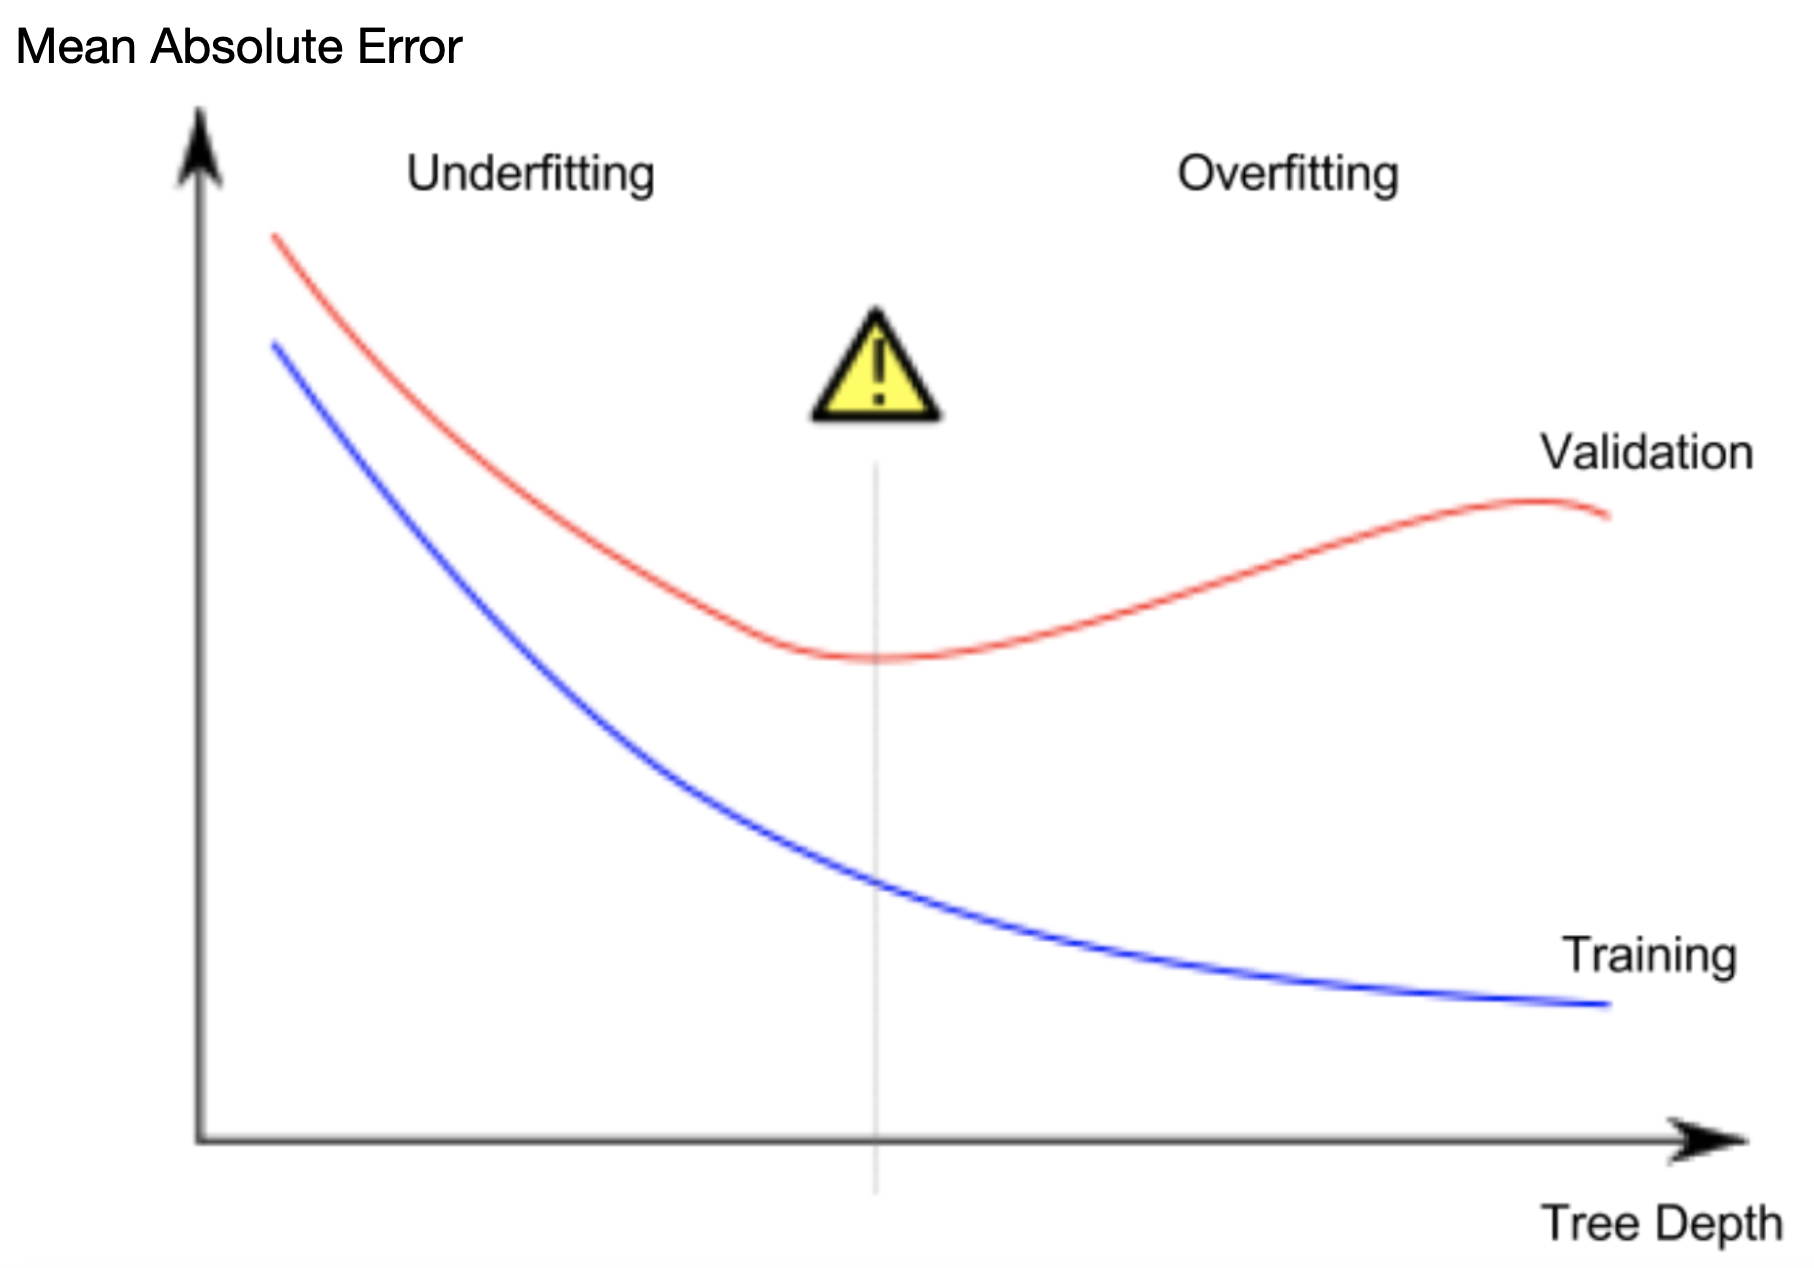

A profundidade da árvore pode ser configurada pelo argumento max_leaf_nodes no Scikit-learn.

In [36]:
#Criando um novo modelo, mas desta vez configurando um valor para o max leaf nodes
modelo_arvore = DecisionTreeRegressor(max_leaf_nodes=50,random_state=1)

#Treinando o modelo novamente
modelo_arvore.fit(train_X,train_y)

#Obtendo as previsões dos preços das casas utilizando os dados de validação
previsoes = modelo_arvore.predict(val_X)

#Obtendo o MAE com os dados de validação
mean_absolute_error(previsoes,val_y)

25678.738931276413

Ao se configurar um valor para a profundidade da árvore foi possível perceber uma redução no MAE. Para testar diferentes profundidades e encontrar um ponto de equilíbrio, vamos desenvolver uma função que cria um modelo para cada valor de profundidade que definimos e retorna o valor do MAE para este modelo. Em seguida criamos uma lista com diferentes valores que desejamos testar para o max_leaf_nodes e a utilizamos como argumento para a função obter_mae, obtendo o MAE para cada valor da lista.

In [41]:
#Função para obter o MAE para diferentes valores de max_leaf_nodes
def obter_mae(numero_max_ramos,train_X,val_X,train_y,val_y):
    modelo = DecisionTreeRegressor(max_leaf_nodes=numero_max_ramos, random_state=1)
    modelo.fit(train_X , train_y)
    previsao = modelo.predict(val_X)
    mae = mean_absolute_error(previsao , val_y)
    return(mae)

#Lista com diferentes valores de MAE que desejamos testar
candidatos_numero_ramos = [5, 10, 20, 30, 40, 50, 60, 70, 80,  90, 100]

#Loop for para obter o MAE para cada elemento da lista
for candidato in candidatos_numero_ramos:
    mae=obter_mae(candidato, train_X, val_X, train_y, val_y)
    print("Número máximo de ramos: %s, erro absoluto médio %r" %(candidato,mae))

Número máximo de ramos: 5, erro absoluto médio 30659.16215009306
Número máximo de ramos: 10, erro absoluto médio 29547.26419784113
Número máximo de ramos: 20, erro absoluto médio 27312.743214344337
Número máximo de ramos: 30, erro absoluto médio 26056.59531115118
Número máximo de ramos: 40, erro absoluto médio 25976.65491137481
Número máximo de ramos: 50, erro absoluto médio 25678.738931276413
Número máximo de ramos: 60, erro absoluto médio 25669.000847474515
Número máximo de ramos: 70, erro absoluto médio 26024.575917672377
Número máximo de ramos: 80, erro absoluto médio 26367.048046442796
Número máximo de ramos: 90, erro absoluto médio 26600.610500549978
Número máximo de ramos: 100, erro absoluto médio 26374.29733788192


É possível observar que o MAE é grande para valor do max_leaf_nodes igual a 5, indicando um ponto de underfitting do modelo,
fica menor para valores de max_leaf_nodes próximos de 60, e começa a ficar mais alto novamente para valores superiores a 60, indicando o ponto de overfitting.

Então vamos testar o modelo em um range maior de valores do max_leaf_nodes, criando uma lista com mais valores, e em seguida utilizar um loop for para obter o menor MAE dessa lista.

In [47]:
#Criamos uma lista contendo valores de 5 a 100 como candidatos para o max_leaf_nodes
candidato_max_leaf_nodes = list(range(5,100,1))

#Definimos a variavel erro mínimo com um valor bem alto para ser comparado com os MAEs obtidos no loop for
erro_min=10000000

#Loop for que comparada cada MAE obtido na função 
for candidato in candidato_max_leaf_nodes:
    
    mae=obter_mae(candidato, train_X, val_X, train_y, val_y)
    
    if mae < erro_min:
        erro_min=mae
        #Salva o menor MAE obtido na variável melhor_tamanho_arvore
        melhor_tamanho_arvore=candidato
    
print("Erro minimo igual a %s, para número um maximo de ramos igual a %s" %(erro_min,melhor_tamanho_arvore))

Erro minimo igual a 25491.58111828297, para número um maximo de ramos igual a 58


Assim, para o modelo criado até o momento, o melhor valor para max_leaf_nodes é 58.

### Criação do modelo Random Forest

O modelo de árvore de decisão foi melhorado nas etapas anteriores, mas este não é um modelo de machine learning muito sofisticado. Vamos agora utilizar o modelo Random Forest para melhorar os resultados da previsão.

O random forest é um modelo de aprendizado de máquina supervisionado que é usado tanto para classificação quanto para regressão. Ele é construído a partir de muitas árvores de decisão (daí o nome "floresta aleatória") e é uma técnica de ensemble, o que significa que combina vários modelos individuais para melhorar o desempenho geral do modelo.

Cada árvore de decisão no random forest é construída usando uma amostra aleatória dos dados de treinamento e com uma seleção aleatória de recursos (variáveis). O modelo então faz previsões agregando as previsões de cada árvore individual.

Uma das principais vantagens do random forest é que ele pode lidar com dados de alta dimensionalidade e com muitas variáveis, bem como com dados faltantes ou ruidosos. Além disso, é relativamente fácil de usar e interpretar e tem boa capacidade de generalização.

As etapas para criação do modelo Random Forest são as mesmas do modelo Random Forest. 

In [76]:
#Cria o modelo de random forest
rf_model = RandomForestRegressor(random_state=1)

#Treina o modelo com os dados de treinamento
rf_model.fit(train_X, train_y)

#Faz as previsões
rf_val_predictions = rf_model.predict(val_X)

#Obtêm o MAE
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Valor do MAE para o modelo Random Forest: {:,.0f}".format(rf_val_mae)) 

Valor do MAE para o modelo Random Forest: 18,580


Percebe-se a grande redução do valor do MAE em comparação com o obtido pelo modelo Random Forest, que foi de 25.491 dolares.  

Este modelo também pode ser melhorado com o ajuste de seus parâmetros. O n_estimators é um dos hiperparâmetros mais importantes do modelo de Random Forest, e define o número de árvores de decisão que serão criadas na floresta aleatória.

Cada árvore é construída a partir de uma amostra aleatória do conjunto de dados de treinamento e de features disponíveis para o modelo. Portanto, aumentar o número de árvores na floresta pode melhorar o desempenho, mas também pode torná-lo mais lento e mais propenso a overfitting.

Por outro lado, ter um número muito baixo de árvores pode levar a uma subamostragem excessiva dos dados de treinamento, resultando em um modelo com baixa capacidade de generalização.

O valor ideal de n_estimators depende do conjunto de dados específico e geralmente é escolhido por meio de experimentação ou por meio de algoritmos de otimização automática. Em geral, um valor padrão recomendado é de cerca de 100 a 200 árvores, mas isso pode variar dependendo da complexidade do problema e do tamanho do conjunto de dados.

Vamos utilizar uma função semelhante à usada anteriormente para o modelo Decision Tree, mas desta vez para testar diferentes valores de n_estimators do Random Forest. 

In [77]:
#Função para obter o MAE para diferentes valores de n_estimators
def obter_mae(n_estimators,train_X,val_X,train_y,val_y):
    rf_model = RandomForestRegressor(random_state=1, n_estimators=n_estimators)
    rf_model.fit(train_X , train_y)
    previsao = rf_model.predict(val_X)
    mae = mean_absolute_error(previsao , val_y)
    return(mae)


#Criamos uma lista contendo valores de 5 a 100 como candidatos para n_estimators
candidato_n_estimators= list(range(5,200,1))

#Definimos a variavel erro mínimo com um valor bem alto para ser comparado com os MAEs obtidos no loop for
erro_min=10000000

#Loop for que comparada cada MAE obtido na função 
for candidato in candidato_n_estimators:
    
    mae=obter_mae(candidato, train_X, val_X, train_y, val_y)
    
    if mae < erro_min:
        erro_min=mae
        #Salva o menor MAE obtido na variável melhor_tamanho_arvore
        n_est=candidato
    
print("Erro mínimo igual a %s, para n_estimators igual a %s" %(erro_min,n_est))

Erro mínimo igual a 18428.092200478364, para n_estimators igual a 120


O valor do MAE obtido para as previsões do preço das casas até o momento é consideravelmente menor que o obtido no primeiro modelo, que foi de 26.174 dolares. Porém este resultado ainda pode ser melhorado, selecionando-se outras variáveis como features, modificando outros parâmetros dos modelos ou utilizando outros modelos de machine learning, o que será feito em trabalhos futuros.